In [45]:
import pandas as pd
import pyGPs
import numpy as np
import math
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import logging
import re
import sys
import operator
import random

In [2]:
df2017 = pd.read_csv("2017games.csv")
df2017.drop(columns=['StartTime', 'Unnamed: 6', 'Unnamed: 7', 'Notes', 'Attendance'], inplace=True)
df2017["MarginHome"] = df2017["PointsHome"] - df2017["PointsAway"]
df2017

,Date,TeamAway,PointsAway,TeamHome,PointsHome,MarginHome
0,Tue Oct 25 2016,New York Knicks,88,Cleveland Cavaliers,117,29
1,Tue Oct 25 2016,San Antonio Spurs,129,Golden State Warriors,100,-29
2,Tue Oct 25 2016,Utah Jazz,104,Portland Trail Blazers,113,9
3,Wed Oct 26 2016,Brooklyn Nets,117,Boston Celtics,122,5
4,Wed Oct 26 2016,Dallas Mavericks,121,Indiana Pacers,130,9
5,Wed Oct 26 2016,Houston Rockets,114,Los Angeles Lakers,120,6
6,Wed Oct 26 2016,Minnesota Timberwolves,98,Memphis Grizzlies,102,4
7,Wed Oct 26 2016,Charlotte Hornets,107,Milwaukee Bucks,96,-11
8,Wed Oct 26 2016,Denver Nuggets,107,New Orleans Pelicans,102,-5
9,Wed Oct 26 2016,Miami Heat,108,Orlando Magic,96,-12


In [3]:
df2018 = pd.read_csv("2018games.csv")
df2018.drop(columns=['Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Notes', 'Attend.', 'Notes'], inplace=True)
df2018["MarginHome"] = df2018["PTS.1"] - df2018["PTS"]
df2018.columns = ['Date', 'TeamAway', 'PointsAway', 'TeamHome', 'PointsHome', 'MarginHome']
df2018

,Date,TeamAway,PointsAway,TeamHome,PointsHome,MarginHome
0,Tue Oct 17 2017,Boston Celtics,99,Cleveland Cavaliers,102,3
1,Tue Oct 17 2017,Houston Rockets,122,Golden State Warriors,121,-1
2,Wed Oct 18 2017,Milwaukee Bucks,108,Boston Celtics,100,-8
3,Wed Oct 18 2017,Atlanta Hawks,117,Dallas Mavericks,111,-6
4,Wed Oct 18 2017,Charlotte Hornets,90,Detroit Pistons,102,12
5,Wed Oct 18 2017,Brooklyn Nets,131,Indiana Pacers,140,9
6,Wed Oct 18 2017,New Orleans Pelicans,91,Memphis Grizzlies,103,12
7,Wed Oct 18 2017,Miami Heat,109,Orlando Magic,116,7
8,Wed Oct 18 2017,Portland Trail Blazers,124,Phoenix Suns,76,-48
9,Wed Oct 18 2017,Houston Rockets,105,Sacramento Kings,100,-5


In [4]:
teamsDF = pd.read_csv("2017stats.csv")
teamsDF.drop(columns=['Rk', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'FTr', '3PAr', 'TS%', 'Arena', 'Attend.', 'Attend./G'], inplace=True)
teamsDF.columns = ['Team', 'Pace', 'oEFG', 'oTOV', 'ORB', 'oFTR', 'dEFG', 'dTOV', 'DRB', 'dFTR']
# for i, team in df["Team"].iterrows():
teamsDF['Team'] = teamsDF['Team'].map(lambda x: x.rstrip('*'))
teamsDF.sort_values('Team', inplace=True)
teamsDF = teamsDF.reset_index(drop=True)
teamsDF

,Team,Pace,oEFG,oTOV,ORB,oFTR,dEFG,dTOV,DRB,dFTR
0,Atlanta Hawks,97.4,0.504,14.2,23.6,0.215,0.507,13.8,76.1,0.179
1,Boston Celtics,96.8,0.525,12.2,21.2,0.220,0.503,12.6,75.3,0.223
2,Brooklyn Nets,101.3,0.507,14.7,19.6,0.228,0.513,11.6,76.1,0.212
3,Charlotte Hornets,95.7,0.501,10.7,19.9,0.227,0.523,12.1,79.6,0.164
4,Chicago Bulls,95.3,0.487,12.3,27.0,0.206,0.507,12.4,76.8,0.169
5,Cleveland Cavaliers,96.2,0.547,12.6,21.9,0.206,0.516,11.4,75.8,0.174
6,Dallas Mavericks,92.2,0.505,11.6,18.1,0.180,0.529,14.4,77.6,0.218
7,Denver Nuggets,98.3,0.530,13.2,27.3,0.214,0.532,10.9,78.7,0.194
8,Detroit Pistons,95.0,0.492,10.9,24.1,0.157,0.516,12.1,81.2,0.197
9,Golden State Warriors,99.8,0.563,13.2,22.8,0.204,0.486,13.5,74.9,0.198


In [99]:
teamsDF18 = pd.read_csv("2018stats.csv")
teamsDF18.drop(columns=['Rk', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'FTr', '3PAr', 'TS%', 'Arena', 'Attend.', 'Attend./G'], inplace=True)
teamsDF18.columns = ['Team', 'Pace', 'oEFG', 'oTOV', 'ORB', 'oFTR', 'dEFG', 'dTOV', 'DRB', 'dFTR']
# for i, team in df["Team"].iterrows():
teamsDF18['Team'] = teamsDF18['Team'].map(lambda x: x.rstrip('*'))
teamsDF18.sort_values('Team', inplace=True)
teamsDF18 = teamsDF18.reset_index(drop=True)
teamsDF18

,Team,Pace,oEFG,oTOV,ORB,oFTR,dEFG,dTOV,DRB,dFTR
0,Atlanta Hawks,98.3,0.512,14.1,21.0,0.185,0.536,13.6,76.2,0.183
1,Boston Celtics,96.0,0.518,13.0,21.5,0.188,0.495,13.0,78.4,0.191
2,Brooklyn Nets,98.9,0.514,13.6,21.0,0.201,0.517,11.0,77.0,0.201
3,Charlotte Hornets,98.4,0.508,11.4,22.2,0.233,0.532,12.4,80.7,0.165
4,Chicago Bulls,98.3,0.497,12.6,20.6,0.164,0.542,12.4,80.6,0.184
5,Cleveland Cavaliers,98.0,0.547,12.6,20.1,0.214,0.540,12.2,77.3,0.166
6,Dallas Mavericks,95.6,0.513,11.6,18.0,0.166,0.532,12.9,78.9,0.193
7,Denver Nuggets,96.8,0.536,13.4,25.7,0.198,0.539,12.6,77.5,0.173
8,Detroit Pistons,96.2,0.512,12.3,22.7,0.169,0.524,13.7,78.5,0.172
9,Golden State Warriors,99.6,0.569,14.1,21.0,0.195,0.504,12.6,76.3,0.186


In [5]:
def percentCorrect(df):
    numRight = 0
    for index, row in df.iterrows():
        margin = row.MarginHome
        pred = row.PredMean
        if margin > 0 and pred > 0:
            numRight += 1
        if margin < 0 and pred < 0:
            numRight += 1
    #     print(pred)
    return numRight / len(df) * 100

In [169]:
x2017 = []
margins2017 = []
x2018 = []
margins2018 = []

# create x and y
for index, game in df2017.iterrows():
    aTeam = teamsDF.loc[teamsDF['Team'] == game.TeamAway].values.tolist()
    aTeamOff = aTeam[0][2:6]
    aTeamDef = aTeam[0][6:]
    hTeam = teamsDF.loc[teamsDF['Team'] == game.TeamHome].values.tolist()
    hTeamOff = hTeam[0][2:6]
    hTeamDef = hTeam[0][6:]
    hOffDef = list(map(operator.add, hTeamOff, aTeamDef))
    aOffDef = list(map(operator.add, aTeamOff, hTeamDef))
    netOffDef = list(map(operator.sub, hOffDef, aOffDef))
    x2017.append(netOffDef)
    margins2017.append(int(game.MarginHome))

# store predictions
for index, game in df2018.iterrows():
    aTeam = teamsDF18.loc[teamsDF18['Team'] == game.TeamAway].values.tolist()
    aTeamOff = aTeam[0][2:6]
    aTeamDef = aTeam[0][6:]
    hTeam = teamsDF18.loc[teamsDF18['Team'] == game.TeamHome].values.tolist()
    hTeamOff = hTeam[0][2:6]
    hTeamDef = hTeam[0][6:]
    hOffDef = list(map(operator.add, hTeamOff, aTeamDef))
    aOffDef = list(map(operator.add, aTeamOff, hTeamDef))
    netOffDef = list(map(operator.sub, hOffDef, aOffDef))
    x2018.append(netOffDef)
    margins2018.append(int(game.MarginHome))

In [149]:
k = pyGPs.cov.RBF(log_ell=math.log(7.0), log_sigma=math.log(2.0))
k2 = pyGPs.cov.Gabor(log_ell=2.0, log_p=2.5)
model = pyGPs.GPR()
model.setPrior(mean=pyGPs.mean.Const(0), kernel=k)
# model.optimize(np.array(x2017),np.array(margins2017))
nlz, post = model.getPosterior(np.array(x2017), np.array(margins2017), False)
ym, ys2, fmu, fs2, lp = model.predict(np.array(x2018))
for index, game in df2018.iterrows():
    df2018.at[index, 'PredMean'] = ym[index]
    df2018.at[index, 'PredVar'] = ys2[index]
print("NLZ:", nlz)
print("% Right:", percentCorrect(df2018))
df2018

NLZ: 9576088.711601157
% Right: 63.577235772357724


,Date,TeamAway,PointsAway,TeamHome,PointsHome,MarginHome,PredMean,PredVar
0,Tue Oct 17 2017,Boston Celtics,99,Cleveland Cavaliers,102,3,3.759650,0.010070
1,Tue Oct 17 2017,Houston Rockets,122,Golden State Warriors,121,-1,9.652066,0.010080
2,Wed Oct 18 2017,Milwaukee Bucks,108,Boston Celtics,100,-8,5.806437,0.010042
3,Wed Oct 18 2017,Atlanta Hawks,117,Dallas Mavericks,111,-6,2.247183,0.010397
4,Wed Oct 18 2017,Charlotte Hornets,90,Detroit Pistons,102,12,0.242941,0.010161
5,Wed Oct 18 2017,Brooklyn Nets,131,Indiana Pacers,140,9,7.056572,0.010553
6,Wed Oct 18 2017,New Orleans Pelicans,91,Memphis Grizzlies,103,12,1.272717,0.010162
7,Wed Oct 18 2017,Miami Heat,109,Orlando Magic,116,7,-3.419045,0.010117
8,Wed Oct 18 2017,Portland Trail Blazers,124,Phoenix Suns,76,-48,-0.515356,0.010071
9,Wed Oct 18 2017,Houston Rockets,105,Sacramento Kings,100,-5,-5.144367,0.010119


In [170]:
k = pyGPs.cov.RBF(log_ell=math.log(7.0), log_sigma=math.log(2.0))
k2 = pyGPs.cov.Gabor(log_ell=2.0, log_p=2.5)
model = pyGPs.GPR()
model.setPrior(mean=pyGPs.mean.Zero(), kernel=k)
# model.optimize(np.array(x2017),np.array(margins2017))
nlz, post = model.getPosterior(np.array(x2018), np.array(margins2018), False)
ym, ys2, fmu, fs2, lp = model.predict(np.array(x2017))
for index, game in df2017.iterrows():
    df2017.at[index, 'PredMean'] = ym[index]
    df2017.at[index, 'PredVar'] = ys2[index]
print("NLZ:", nlz)
print("% Right:", percentCorrect(df2017))
df2017

NLZ: 9245747.013842678
% Right: 64.14634146341463


,Date,TeamAway,PointsAway,TeamHome,PointsHome,MarginHome,PredMean,PredVar
0,Tue Oct 25 2016,New York Knicks,88,Cleveland Cavaliers,117,29,9.304779,0.010336
1,Tue Oct 25 2016,San Antonio Spurs,129,Golden State Warriors,100,-29,6.841665,0.010062
2,Tue Oct 25 2016,Utah Jazz,104,Portland Trail Blazers,113,9,-1.881994,0.010058
3,Wed Oct 26 2016,Brooklyn Nets,117,Boston Celtics,122,5,12.732586,0.010271
4,Wed Oct 26 2016,Dallas Mavericks,121,Indiana Pacers,130,9,7.813417,0.010183
5,Wed Oct 26 2016,Houston Rockets,114,Los Angeles Lakers,120,6,-10.463806,0.010090
6,Wed Oct 26 2016,Minnesota Timberwolves,98,Memphis Grizzlies,102,4,2.918386,0.010140
7,Wed Oct 26 2016,Charlotte Hornets,107,Milwaukee Bucks,96,-11,3.090384,0.010224
8,Wed Oct 26 2016,Denver Nuggets,107,New Orleans Pelicans,102,-5,-0.843488,0.010773
9,Wed Oct 26 2016,Miami Heat,108,Orlando Magic,96,-12,-3.743238,0.010110


In [8]:
print("Home Games Won in 2017:", len(df2017[df2017.MarginHome > 0]) / len(df2017))
print("Home Games Won in 2018:", len(df2018[df2018.MarginHome > 0]) / len(df2018))

Home Games Won in 2017: 0.583739837398374
Home Games Won in 2018: 0.5788617886178862


In [28]:
winProbDict = {
    0:50.0,
    0.5:50.0,
    1:51.1,
    1.5:52.3,
    2:54.3,
    2.5:56.3,
    3:58.2,
    3.5:60.1,
    4:61.9,
    4.5:63.6,
    5:65.8,
    5.5:68.0,
    6:70.1,
    6.5:72.1,
    7:74.2,
    7.5:76.3,
    8:78.4,
    8.5:80.5,
    9:82.8,
    9.5:85.2,
    10:87.3,
    10.5:89.4,
    11:91.3,
    11.5:93.2,
    12:95.0,
    12.5:96.8,
    13:98.7,
    13.5:100.0
}

In [155]:
def seriesPred(away, home):
    aTeam = teamsDF18.loc[teamsDF18['Team'] == away].values.tolist()
    aTeamOff = aTeam[0][2:6]
    aTeamDef = aTeam[0][6:]
    hTeam = teamsDF18.loc[teamsDF18['Team'] == home].values.tolist()
    hTeamOff = hTeam[0][2:6]
    hTeamDef = hTeam[0][6:]
    hOffDef = list(map(operator.add, hTeamOff, aTeamDef))
    aOffDef = list(map(operator.add, aTeamOff, hTeamDef))
    hNetOffDef = list(map(operator.sub, hOffDef, aOffDef))
    aNetOffDef = list(map(operator.sub, aOffDef, hOffDef))
    ym, ys2, fm, fs2, lp = model.predict(np.array([hNetOffDef, aNetOffDef]))
    hPredMargin = ym[0][0]
    aPredMargin = ym[1][0]
    hRoundedPred = round(hPredMargin * 2) / 2
#     print(hRoundedPred)
    aRoundedPred = round(aPredMargin * 2) / 2
#     print(aRoundedPred)
    hProb = 0
    if hRoundedPred > 13.5:
        hProb = winProbDict[13.5]
    elif hRoundedPred < 0:
        hProb = 100 - winProbDict[-1 * hRoundedPred]
    else:
        hProb = winProbDict[hRoundedPred]
#     print("Home Prob:", hProb)
    aProb = 0
    if aRoundedPred > 13.5:
        aProb = 100 - winProbDict[13.5]
    elif aRoundedPred < 0:
        aProb = winProbDict[-1 * aRoundedPred]
    else:
        aProb = 100 - winProbDict[aRoundedPred]
#     print("Away Prob:", aProb)
    aWins = 0
    hWins = 0
    for i in range(1, 9):
        if aWins == 4:
            return away, i-1
        if hWins == 4:
            return home, i-1
        prob = 0
        if i == 1 or i == 2 or i == 5 or i == 7:
            prob = hProb
        else:
            prob = aProb
        randNum = random.uniform(0, 100)
        if randNum < prob:
            hWins += 1
#             print(home, "Win Game", i)
        else:
            aWins +=1
#             print(away, "Win Game", i)

In [93]:
# 2017 First round
aTeam = "Chicago Bulls"
hTeam = "Boston Celtics"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Atlanta Hawks"
hTeam = "Washington Wizards"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Milwaukee Bucks"
hTeam = "Toronto Raptors"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Indiana Pacers"
hTeam = "Cleveland Cavaliers"

print(seriesPred(aTeam, hTeam))
print()

aTeam = "Portland Trail Blazers"
hTeam = "Golden State Warriors"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Utah Jazz"
hTeam = "Los Angeles Clippers"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Oklahoma City Thunder"
hTeam = "Houston Rockets"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Memphis Grizzlies"
hTeam = "San Antonio Spurs"
print(seriesPred(aTeam, hTeam))

6.5
1.0
Home Prob: 72.1
Away Prob: 48.9
Boston Celtics Win Game 1
Boston Celtics Win Game 2
Chicago Bulls Win Game 3
Chicago Bulls Win Game 4
Boston Celtics Win Game 5
Chicago Bulls Win Game 6
Boston Celtics Win Game 7
Boston Celtics Win in 7 Games

4.5
2.0
Home Prob: 63.6
Away Prob: 45.7
Washington Wizards Win Game 1
Washington Wizards Win Game 2
Washington Wizards Win Game 3
Atlanta Hawks Win Game 4
Washington Wizards Win Game 5
Washington Wizards Win in 5 Games

6.0
-0.5
Home Prob: 70.1
Away Prob: 50.0
Toronto Raptors Win Game 1
Milwaukee Bucks Win Game 2
Milwaukee Bucks Win Game 3
Toronto Raptors Win Game 4
Toronto Raptors Win Game 5
Toronto Raptors Win Game 6
Toronto Raptors Win in 6 Games

5.5
0.0
Home Prob: 68.0
Away Prob: 50.0
Cleveland Cavaliers Win Game 1
Cleveland Cavaliers Win Game 2
Cleveland Cavaliers Win Game 3
Cleveland Cavaliers Win Game 4
Cleveland Cavaliers Win in 4 Games

14.5
-8.0
Home Prob: 100.0
Away Prob: 78.4
Golden State Warriors Win Game 1
Golden State Warrio

In [94]:
# 2017 Conference Semis
aTeam = "Washington Wizards"
hTeam = "Boston Celtics"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Toronto Raptors"
hTeam = "Cleveland Cavaliers"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Los Angeles Clippers"
hTeam = "Golden State Warriors"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Houston Rockets"
hTeam = "San Antonio Spurs"
print(seriesPred(aTeam, hTeam))

4.5
2.5
Home Prob: 63.6
Away Prob: 43.7
Boston Celtics Win Game 1
Washington Wizards Win Game 2
Boston Celtics Win Game 3
Washington Wizards Win Game 4
Boston Celtics Win Game 5
Boston Celtics Win Game 6
Boston Celtics Win in 6 Games

-2.0
2.5
Home Prob: 45.7
Away Prob: 43.7
Cleveland Cavaliers Win Game 1
Toronto Raptors Win Game 2
Cleveland Cavaliers Win Game 3
Toronto Raptors Win Game 4
Toronto Raptors Win Game 5
Toronto Raptors Win Game 6
Toronto Raptors Win in 6 Games

9.5
-2.5
Home Prob: 85.2
Away Prob: 56.3
Golden State Warriors Win Game 1
Golden State Warriors Win Game 2
Golden State Warriors Win Game 3
Golden State Warriors Win Game 4
Golden State Warriors Win in 4 Games

4.5
4.0
Home Prob: 63.6
Away Prob: 38.1
San Antonio Spurs Win Game 1
Houston Rockets Win Game 2
Houston Rockets Win Game 3
Houston Rockets Win Game 4
San Antonio Spurs Win Game 5
Houston Rockets Win Game 6
Houston Rockets Win in 6 Games


In [95]:
# 2017 Conference Finals
aTeam = "Toronto Raptors"
hTeam = "Boston Celtics"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Houston Rockets"
hTeam = "Golden State Warriors"
print(seriesPred(aTeam, hTeam))

1.0
4.5
Home Prob: 51.1
Away Prob: 36.4
Boston Celtics Win Game 1
Toronto Raptors Win Game 2
Toronto Raptors Win Game 3
Toronto Raptors Win Game 4
Toronto Raptors Win Game 5
Toronto Raptors Win in 5 Games

9.5
-1.0
Home Prob: 85.2
Away Prob: 51.1
Golden State Warriors Win Game 1
Golden State Warriors Win Game 2
Houston Rockets Win Game 3
Houston Rockets Win Game 4
Golden State Warriors Win Game 5
Golden State Warriors Win Game 6
Golden State Warriors Win in 6 Games


In [96]:
# 2017 Finals
aTeam = "Toronto Raptors"
hTeam = "Golden State Warriors"
print(seriesPred(aTeam, hTeam))

9.0
-3.0
Home Prob: 82.8
Away Prob: 58.2
Golden State Warriors Win Game 1
Golden State Warriors Win Game 2
Golden State Warriors Win Game 3
Golden State Warriors Win Game 4
Golden State Warriors Win in 4 Games


In [107]:
# 2018

aTeam = "Washington Wizards"
hTeam = "Toronto Raptors"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Indiana Pacers"
hTeam = "Cleveland Cavaliers"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Miami Heat"
hTeam = "Philadelphia 76ers"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Milwaukee Bucks"
hTeam = "Boston Celtics"

print(seriesPred(aTeam, hTeam))
print()

aTeam = "Minnesota Timberwolves"
hTeam = "Houston Rockets"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Utah Jazz"
hTeam = "Oklahoma City Thunder"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "New Orleans Pelicans"
hTeam = "Portland Trail Blazers"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "San Antonio Spurs"
hTeam = "Golden State Warriors"
print(seriesPred(aTeam, hTeam))

7.5
-4.5
Home Prob: 76.3
Away Prob: 63.6
Washington Wizards Win Game 1
Toronto Raptors Win Game 2
Washington Wizards Win Game 3
Toronto Raptors Win Game 4
Toronto Raptors Win Game 5
Toronto Raptors Win Game 6
Toronto Raptors Win in 6 Games

1.5
3.0
Home Prob: 52.3
Away Prob: 41.8
Cleveland Cavaliers Win Game 1
Cleveland Cavaliers Win Game 2
Indiana Pacers Win Game 3
Indiana Pacers Win Game 4
Cleveland Cavaliers Win Game 5
Indiana Pacers Win Game 6
Indiana Pacers Win Game 7
Indiana Pacers Win in 7 Games

6.5
-1.0
Home Prob: 72.1
Away Prob: 51.1
Philadelphia 76ers Win Game 1
Philadelphia 76ers Win Game 2
Miami Heat Win Game 3
Miami Heat Win Game 4
Miami Heat Win Game 5
Miami Heat Win Game 6
Miami Heat Win in 6 Games

2.5
2.0
Home Prob: 56.3
Away Prob: 45.7
Boston Celtics Win Game 1
Milwaukee Bucks Win Game 2
Boston Celtics Win Game 3
Milwaukee Bucks Win Game 4
Boston Celtics Win Game 5
Milwaukee Bucks Win Game 6
Boston Celtics Win Game 7
Boston Celtics Win in 7 Games

3.0
-3.0
Home Prob:

In [108]:
# 2018 Conference Semis
aTeam = "Cleveland Cavaliers"
hTeam = "Toronto Raptors"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Philadelphia 76ers"
hTeam = "Boston Celtics"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "Utah Jazz"
hTeam = "Houston Rockets"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "New Orleans Pelicans"
hTeam = "Golden State Warriors"
print(seriesPred(aTeam, hTeam))

6.5
-2.5
Home Prob: 72.1
Away Prob: 56.3
Toronto Raptors Win Game 1
Cleveland Cavaliers Win Game 2
Cleveland Cavaliers Win Game 3
Toronto Raptors Win Game 4
Toronto Raptors Win Game 5
Cleveland Cavaliers Win Game 6
Toronto Raptors Win Game 7
Toronto Raptors Win in 7 Games

1.0
3.0
Home Prob: 51.1
Away Prob: 41.8
Boston Celtics Win Game 1
Philadelphia 76ers Win Game 2
Philadelphia 76ers Win Game 3
Boston Celtics Win Game 4
Philadelphia 76ers Win Game 5
Boston Celtics Win Game 6
Boston Celtics Win Game 7
Boston Celtics Win in 7 Games

5.5
-2.0
Home Prob: 68.0
Away Prob: 54.3
Houston Rockets Win Game 1
Houston Rockets Win Game 2
Utah Jazz Win Game 3
Utah Jazz Win Game 4
Houston Rockets Win Game 5
Utah Jazz Win Game 6
Utah Jazz Win Game 7
Utah Jazz Win in 7 Games

6.0
-2.5
Home Prob: 70.1
Away Prob: 56.3
New Orleans Pelicans Win Game 1
New Orleans Pelicans Win Game 2
New Orleans Pelicans Win Game 3
New Orleans Pelicans Win Game 4
New Orleans Pelicans Win in 4 Games


In [109]:
# 2018 Conference Finals
aTeam = "Boston Celtics"
hTeam = "Toronto Raptors"
print(seriesPred(aTeam, hTeam))
print()

aTeam = "New Orleans Pelicans"
hTeam = "Utah Jazz"
print(seriesPred(aTeam, hTeam))

5.5
-1.0
Home Prob: 68.0
Away Prob: 51.1
Toronto Raptors Win Game 1
Toronto Raptors Win Game 2
Toronto Raptors Win Game 3
Boston Celtics Win Game 4
Toronto Raptors Win Game 5
Toronto Raptors Win in 5 Games

2.5
1.0
Home Prob: 56.3
Away Prob: 48.9
Utah Jazz Win Game 1
Utah Jazz Win Game 2
New Orleans Pelicans Win Game 3
Utah Jazz Win Game 4
New Orleans Pelicans Win Game 5
New Orleans Pelicans Win Game 6
New Orleans Pelicans Win Game 7
New Orleans Pelicans Win in 7 Games


In [110]:
# 2018 Finals
aTeam = "New Orleans Pelicans"
hTeam = "Toronto Raptors"
print(seriesPred(aTeam, hTeam))

6.0
-1.5
Home Prob: 70.1
Away Prob: 52.3
Toronto Raptors Win Game 1
Toronto Raptors Win Game 2
New Orleans Pelicans Win Game 3
Toronto Raptors Win Game 4
Toronto Raptors Win Game 5
Toronto Raptors Win in 5 Games


In [127]:
# df2018
tempDF = df2018.sort_values('MarginHome')
tempDF = tempDF.reset_index(drop=True)
tempDF

,Date,TeamAway,PointsAway,TeamHome,PointsHome,MarginHome,PredMean,PredVar
0,Wed Feb 7 2018,San Antonio Spurs,129,Phoenix Suns,81,-48,-5.612174,0.010120
1,Wed Oct 18 2017,Portland Trail Blazers,124,Phoenix Suns,76,-48,-0.515356,0.010071
2,Sat Nov 18 2017,Utah Jazz,125,Orlando Magic,85,-40,-4.902428,0.010106
3,Fri Apr 6 2018,Charlotte Hornets,137,Orlando Magic,100,-37,-1.080381,0.010166
4,Wed Jan 3 2018,Oklahoma City Thunder,133,Los Angeles Lakers,96,-37,-0.069182,0.010049
5,Wed Jan 10 2018,Detroit Pistons,114,Brooklyn Nets,80,-34,-1.462215,0.010821
6,Sat Nov 25 2017,Toronto Raptors,112,Atlanta Hawks,78,-34,-1.851147,0.010091
7,Wed Mar 21 2018,Denver Nuggets,135,Chicago Bulls,102,-33,3.756336,0.010131
8,Wed Apr 11 2018,Detroit Pistons,119,Chicago Bulls,87,-32,5.385265,0.010300
9,Sat Feb 3 2018,Houston Rockets,120,Cleveland Cavaliers,88,-32,0.830454,0.010059


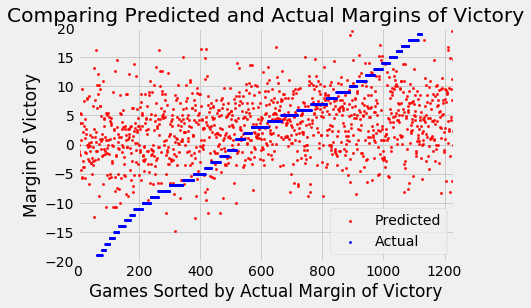

In [144]:
r = plt.scatter(tempDF.index, tempDF.PredMean, color='r', s=5)
b = plt.scatter(tempDF.index, tempDF.MarginHome, color='b', s=5)
# plt.grid()
plt.axis([0,1230,-20,20])
plt.xlabel('Games Sorted by Actual Margin of Victory')
plt.ylabel('Margin of Victory')
plt.title("Comparing Predicted and Actual Margins of Victory")
plt.legend((r, b),
           ('Predicted', 'Actual'),
           ncol=1)
plt.show()

In [145]:
np.mean(df2018.MarginHome)

2.105691056910569

{'A4': 3, 'A5': 8, 'A6': 13, 'A7': 12, 'H4': 12, 'H5': 18, 'H6': 19, 'H7': 15}


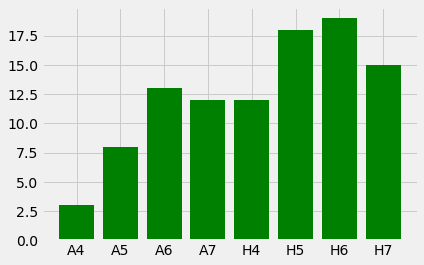

{'A4': 3, 'A5': 8, 'A6': 13, 'A7': 12, 'H4': 12, 'H5': 18, 'H6': 19, 'H7': 15}

In [178]:
def seriesHist(aTeam, hTeam):
    resultDict = {
        "A4":0,
        "A5":0,
        "A6":0,
        "A7":0,
        "H4":0,
        "H5":0,
        "H6":0,
        "H7":0
    }
    for i in range (0, 100):
        winTeam, games = seriesPred(aTeam, hTeam)
        strKey = str(games)
        if winTeam == aTeam:
            strKey = "A" + strKey
        else:
            strKey = "H" + strKey
        resultDict[strKey] = resultDict[strKey] + 1
    plt.bar(list(resultDict.keys()), resultDict.values(), color='g')
    print(resultDict)
    plt.show()
    return resultDict
        
aTeam = "Cleveland Cavaliers"
hTeam = "Oklahoma City Thunder"
seriesHist(aTeam, hTeam)